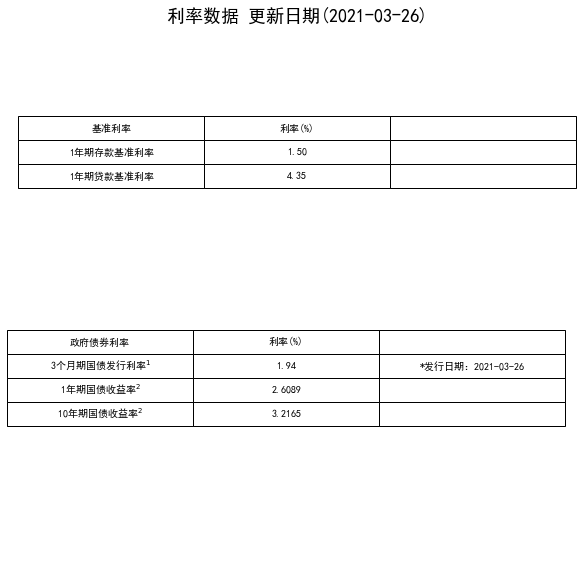

In [1]:
import requests
import json
import time
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei']      
plt.rcParams['axes.unicode_minus'] = False

t = str(round(time.time() * 1000))

url = "http://www.chinamoney.com.cn/r/cms/www/chinamoney/data/currency/sdds-intr-rate.json?t=" + t

res = requests.get(url)
data = json.loads(res.text)

showDateCN = data['data']['showDateCN']
depoRate1Y = data['data']['depoRate1Y']
lendRate1Y = data['data']['lendRate1Y']
bond3M = data['data']['bond3M']
lastDate3M = data['data']['lastDate3M']
bond1Y = data['data']['bond1Y']
bond10Y = data['data']['bond10Y']

fig=plt.figure(figsize=(10,10))

ax1 = plt.subplot(211,frameon=False)
ax1.set_title("利率数据 更新日期({})".format(showDateCN),fontsize = 18)
plt.xticks([])
plt.yticks([])
col1_labels=['基准利率','利率(%)','']
table1_vals = [['1年期存款基准利率',depoRate1Y,''],['1年期贷款基准利率',lendRate1Y,'']]
table1 = plt.table(cellText=table1_vals,colLabels=col1_labels,loc="center",cellLoc="center")
table1.scale(1,2)

ax2 = plt.subplot(212,frameon=False)
plt.xticks([])
plt.yticks([])
col2_labels=['政府债券利率','利率(%)','']
table2_vals = [['3个月期国债发行利率$^{1}$',bond3M,'*发行日期：'+lastDate3M],
                ['1年期国债收益率$^{2}$',bond1Y,''],
                ['10年期国债收益率$^{2}$',bond10Y,'']]
table2 = plt.table(cellText=table2_vals,colLabels=col2_labels,loc="best",cellLoc="center")
table2.scale(1,2)

plt.show()